<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Classifica%C3%A7%C3%A3o_Img_Digitos_Melhorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.leayes.normalization import BatchNormalization

In [0]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'classe4')

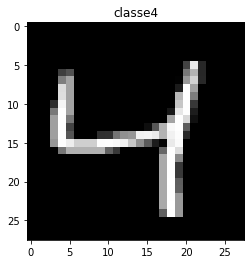

In [11]:
plt.imshow(X_treinamento[2], cmap = 'gray') # somente altera a visualização desta img, porem esse é o objetivo final para todas
plt.title('classe' + str(y_treinamento[2]))

In [0]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')
previsores_treinamento /= 255 #deixa os valores em escala de 0 a 1
previsores_teste /= 255 # 255 pois cada valor ocupa 1 bit e cada bit vai de 0 a 255 na faixa RGB

In [0]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10) # variavel dummy
classe_teste = np_utils.to_categorical(y_teste, 10) # variavel dummy

In [0]:
#rede neural
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classificador.add(BatchNormalizaton())#Melhoria
classificador.add(MaxPooling2D(pool_size = (2, 2)))

classificador.add(Conv2D(32, (3, 3), activation = 'relu'))#Melhoria
classificador.add(BatchNormalizaton())#Melhoria
classificador.add(MaxPooling2D(pool_size = (2, 2)))#Melhoria
classificador.add(Flatten())#flatten só é utilizado apos a finalização da utilização da normalização e o maxpooling

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))#Melhoria
classificador.add(Dense(units = 128, activation = 'relu'))#Melhoria
classificador.add(Dropout(0.2))#Melhoria
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))